In [ ]:
# Описание
# На этот раз данные имеют следующую структуру:

# записываются для каждого пользователя, совершившего покупки, каждый день
# для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
# внутри каждой папки есть файл data.csv, где и хранятся данные
# Схематично выглядит так:

# └── data
#    ├── 2020-12-30
#    │  ├── FirstName_LastName1
#    │  │   └── data.csv
#    │  ├── FirstName_LastName2
#    │  │   └── data.csv
#    │  └── FirstName_LastName3
#    │      └── data.csv
#    └── 2020-12-31
#       ├── FirstName_LastName1
#       │   └── data.csv
#       └── FirstName_LastName5
#           └── data.csv
# Например, 30 декабря три покупателя сделали покупки, 31 – два 
# (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, 
# для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

# Note: данные в задании покрывают другой временной период, имена тоже другие. 
# Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

# Задачи:
# Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
#     колонки из самих файлов (product_id, quantity), а также имя пользователя (name), 
#     и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
# Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена
# через запятую с пробелом и в алфавитном порядке.
# Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
# Сколько было продано единиц товара с product_id==56?
# Визуализируйте продажи по дням.
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать 
# покупку товара с одинаковым product_id, совершенную в разные дни. 

In [108]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [107]:
os.getcwd()

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-baryshnikov/lesson_4'

In [4]:
os.listdir()

['data',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'df_minutes.csv',
 '.ipynb_checkpoints',
 'lesson_4.ipynb',
 'Untitled2.ipynb',
 '4_data.zip',
 'F000570',
 'M000547',
 'F000545']

In [5]:
root_folder = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-baryshnikov/lesson_4/data'

In [12]:
sub_folders = os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-baryshnikov/lesson_4/data')

In [13]:
sub_folders

['2020-12-08',
 '2020-12-04',
 '2020-12-05',
 '2020-12-07',
 '2020-12-06',
 '2020-12-03',
 '2020-12-09']

In [45]:
# Обойдём все папки с данными (data/дата/пользователь/data.csv) и соберём их
df = pd.DataFrame()
for i in sub_folders:
    user_folders = os.listdir(root_folder + '/' + i)
    for user in user_folders:
        data_file = root_folder + '/' + i + '/' + user + '/data.csv'
        data_file_df = pd.read_csv(data_file)
        data_file_df['name'] = user
        data_file_df['date'] = i
        df = pd.concat([df, data_file_df[['product_id', 'quantity', 'name', 'date']]], ignore_index=True)

In [46]:
df.dtypes

product_id     int64
quantity       int64
name          object
date          object
dtype: object

In [51]:
# Купили больше всего товаров
df.groupby('name', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [56]:
top10_goods_sold = df.groupby('product_id', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(10)
top10_goods_sold

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


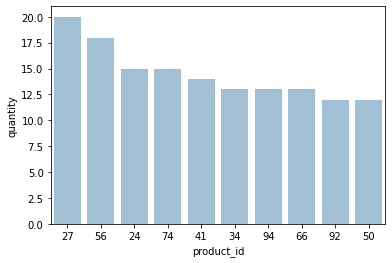

In [82]:
# Топ-10 товаров по продажам
sns.barplot(x=top10_goods_sold['product_id'], y=top10_goods_sold['quantity'], color='tab:blue', alpha=0.45, order=[27, 56, 24, 74, 41, 34, 94, 66, 92, 50])

In [92]:
df.head()

,product_id,quantity,name,date
0,36,4,Rostislav_Petrov,2020-12-08
1,24,2,Rostislav_Petrov,2020-12-08
2,23,1,Rostislav_Petrov,2020-12-08
3,27,5,Rostislav_Petrov,2020-12-08
4,32,3,Rostislav_Petrov,2020-12-08


In [98]:
df['date'] = pd.to_datetime(df['date'])

In [114]:
date_sales = df.groupby('date', as_index=False).agg({'quantity': 'sum'})

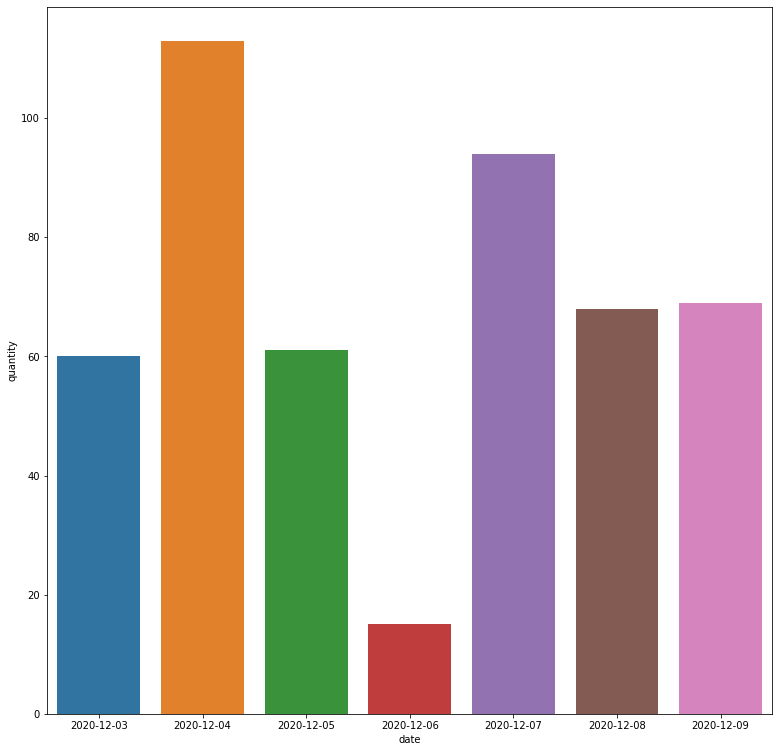

In [116]:
# Продажи по датам
plt.figure(figsize=(13,13))
sns.barplot(x=date_sales.date.dt.date, y=date_sales.quantity)

In [131]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

# Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день,
# повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, 
# но в разные дни, поэтому этот случай засчитывается.
df_no_duplicates = df.drop_duplicates(subset=['product_id', 'name', 'date'])

In [133]:
df_no_duplicates.loc[df_no_duplicates.duplicated(subset=['name', 'product_id'])]

,product_id,quantity,name,date
135,94,4,Petr_Fedorov,2020-12-03
154,15,3,Anton_Ivanov,2020-12-09
